## 1. Loading  Dependencies and Datasets

In [66]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [68]:
# Reading the data 
churn_data = pd.read_csv("train.csv")

In [69]:
# Looking at initial 10 rows of the data

churn_data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [70]:
churn_data.set_index('id',inplace=True) # Setting the id column as the index

In [179]:
# loading the unseen data which will be used for final prediction 

unseen_data=pd.read_csv("test.csv")

In [72]:
# looking at the shape of both the datasets

print(churn_data.shape)
print(unseen_data.shape)

(69999, 171)
(30000, 171)


In [73]:
# Getting information about the data 
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   circle_id                 int64  
 1   loc_og_t2o_mou            float64
 2   std_og_t2o_mou            float64
 3   loc_ic_t2o_mou            float64
 4   last_date_of_month_6      object 
 5   last_date_of_month_7      object 
 6   last_date_of_month_8      object 
 7   arpu_6                    float64
 8   arpu_7                    float64
 9   arpu_8                    float64
 10  onnet_mou_6               float64
 11  onnet_mou_7               float64
 12  onnet_mou_8               float64
 13  offnet_mou_6              float64
 14  offnet_mou_7              float64
 15  offnet_mou_8              float64
 16  roam_ic_mou_6             float64
 17  roam_ic_mou_7             float64
 18  roam_ic_mou_8             float64
 19  roam_og_mou_6             float64
 20  roam_og_mou_7             f

In [74]:
# Looking  at  Statistical Description 

churn_data.describe(include="all")

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000,69999.000000,17

## Handling Missing values

In [75]:
# importing missingno

import missingno as msno

In [76]:
# looking at percentage of missing value in each column 

missing_data_percent = (churn_data.isnull().sum().sort_values(ascending=False))*100/churn_data.shape[0]
missing_data_percent

max_rech_data_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
count_rech_2g_6             74.902499
av_rech_amt_data_6          74.902499
arpu_3g_6                   74.902499
night_pck_user_6            74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_7           74.478207
fb_user_7                   74.478207
max_rech_data_7             74.478207
av_rech_amt_data_7          74.478207
count_rech_2g_7             74.478207
date_of_last_rech_data_7    74.478207
count_rech_3g_7             74.478207
arpu_2g_7                   74.478207
night_pck_user_7            74.478207
arpu_3g_7                   74.478207
arpu_2g_8                   73.689624
av_rech_amt_data_8          73.689624
arpu_3g_8                   73.689624
count_rech_2g_8             73.689624
night_pck_user_8            73.689624
count_rech_3g_8             73.689624
max_rech_dat

### Imputing Missing Values 

#### Imputing with Zeroes

In [77]:
# Imputing recharge columns
rechargeColumns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',] 
                

churn_data[rechargeColumns].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


**Whenever recharge data and date is missing, we can conclude that customer hasn't recharged on that particular day, so we can impute those records with 0**

In [78]:
churn_data.loc[churn_data.total_rech_data_6.isnull() & churn_data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
id,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN


In [79]:
# Creating a list of recharge columns which can be imputed with 0s

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',]

In [80]:
# impute missing values with 0
churn_data[zero_impute] = churn_data[zero_impute].apply(lambda x: x.fillna(0))

In [81]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn_data[zero_impute].isnull().sum()*100/churn_data.shape[1])

# summary statistics
print("\n\nSummary statistics\n")
print(churn_data[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [82]:
# Checking null values for all columns
round((churn_data.isnull().mean().sort_values(ascending=False))*100,2)

arpu_3g_6                   74.90
arpu_2g_6                   74.90
count_rech_3g_6             74.90
night_pck_user_6            74.90
fb_user_6                   74.90
count_rech_2g_6             74.90
date_of_last_rech_data_6    74.90
count_rech_3g_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
night_pck_user_7            74.48
arpu_3g_7                   74.48
arpu_2g_7                   74.48
date_of_last_rech_data_7    74.48
arpu_2g_8                   73.69
count_rech_3g_8             73.69
date_of_last_rech_data_8    73.69
arpu_3g_8                   73.69
fb_user_8                   73.69
count_rech_2g_8             73.69
night_pck_user_8            73.69
std_og_mou_8                 5.29
std_ic_t2m_mou_8             5.29
loc_og_t2m_mou_8             5.29
loc_og_t2t_mou_8             5.29
loc_og_t2f_mou_8             5.29
std_ic_t2o_mou_8             5.29
loc_og_t2c_mou_8             5.29
std_ic_mou_8                 5.29
std_og_t2f_mou

In [83]:
# Creating list of columns by column type 

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8']


cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
            
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']

In [84]:
# dropping the date and circle_id columns

id_col = ['circle_id']
churn_data = churn_data.drop(id_col+date_cols,axis=1)

In [85]:
# lets's check the shape of the churn dataset once again

churn_data.shape

(69999, 161)

### Replacing NaN values in categorical variables 

We will replace the NaN values in categorical variables with '-1'

In [86]:
# replace missing values with '-1' in categorical columns
churn_data[cat_cols] = churn_data[cat_cols].apply(lambda x: x.fillna(-1))

In [87]:
# checking the percentage of missing value in categorical columns

churn_data[cat_cols].isnull().mean()*100

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

### Dropping Columns having Missing values more than 40% from the total dataset 

In [88]:
# Number of Invalid Columns
invalidColumns=churn_data.isnull().sum()
invalidColumns=invalidColumns[invalidColumns.values/len(churn_data)>0.40]
len(invalidColumns)

12

In [89]:
# Dropping the columns which have more than 40% null values

invalidColumns=list(invalidColumns.keys())
churn_data=churn_data.drop(invalidColumns,axis=1)

In [90]:
# Cross Checking the Invalid Columnns 

invalidColumns=churn_data.isnull().sum()
invalidColumns=invalidColumns[invalidColumns.values/len(churn_data)>0.40]
len(invalidColumns)

0

**12 columns were dropped as they were having missing values more than 40%**

In [91]:
# Checking again now for null values

round((churn_data.isnull().mean().sort_values(ascending=False))*100,2)

std_ic_t2t_mou_8      5.29
loc_og_mou_8          5.29
og_others_8           5.29
std_ic_mou_8          5.29
loc_og_t2f_mou_8      5.29
spl_og_mou_8          5.29
loc_og_t2c_mou_8      5.29
spl_ic_mou_8          5.29
isd_ic_mou_8          5.29
loc_og_t2t_mou_8      5.29
std_og_t2t_mou_8      5.29
ic_others_8           5.29
std_og_t2m_mou_8      5.29
isd_og_mou_8          5.29
std_og_t2f_mou_8      5.29
std_og_mou_8          5.29
std_ic_t2o_mou_8      5.29
loc_og_t2m_mou_8      5.29
std_ic_t2f_mou_8      5.29
roam_ic_mou_8         5.29
loc_ic_t2t_mou_8      5.29
loc_ic_t2m_mou_8      5.29
onnet_mou_8           5.29
loc_ic_t2f_mou_8      5.29
loc_ic_mou_8          5.29
offnet_mou_8          5.29
std_og_t2c_mou_8      5.29
roam_og_mou_8         5.29
std_ic_t2m_mou_8      5.29
std_ic_mou_6          3.95
std_ic_t2f_mou_6      3.95
isd_og_mou_6          3.95
loc_ic_t2m_mou_6      3.95
spl_og_mou_6          3.95
loc_ic_t2f_mou_6      3.95
og_others_6           3.95
std_ic_t2t_mou_6      3.95
l

**Now We can impute the remaining numerical columns with median values as we have outliers and median is the best choice**

In [92]:
churn_data=churn_data.fillna(churn_data.median())

In [93]:
#checking the null values if left any 

churn_data.isnull().sum().sort_values(ascending=False)

churn_probability     0
og_others_6           0
spl_og_mou_7          0
spl_og_mou_6          0
isd_og_mou_8          0
isd_og_mou_7          0
isd_og_mou_6          0
std_og_mou_8          0
std_og_mou_7          0
std_og_mou_6          0
std_og_t2c_mou_8      0
std_og_t2c_mou_7      0
std_og_t2c_mou_6      0
std_og_t2f_mou_8      0
std_og_t2f_mou_7      0
std_og_t2f_mou_6      0
std_og_t2m_mou_8      0
spl_og_mou_8          0
og_others_7           0
std_ic_t2t_mou_7      0
og_others_8           0
loc_ic_mou_8          0
loc_ic_mou_7          0
loc_ic_mou_6          0
loc_ic_t2f_mou_8      0
loc_ic_t2f_mou_7      0
loc_ic_t2f_mou_6      0
loc_ic_t2m_mou_8      0
loc_ic_t2m_mou_7      0
loc_ic_t2m_mou_6      0
loc_ic_t2t_mou_8      0
loc_ic_t2t_mou_7      0
loc_ic_t2t_mou_6      0
total_og_mou_8        0
total_og_mou_7        0
total_og_mou_6        0
std_og_t2m_mou_7      0
std_og_t2m_mou_6      0
std_og_t2t_mou_8      0
std_og_t2t_mou_7      0
roam_og_mou_6         0
roam_ic_mou_8   

In [94]:
# calculating the churn ratio

churn_data['churn_probability'] = churn_data['churn_probability'].astype('category')

print("Churn Ratio :")

print(churn_data['churn_probability'].value_counts()*100/churn_data.shape[0])

Churn Ratio :
0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


## DATA Visualization

In [95]:
# converting categorical columns into categorical data type
churn_data[cat_cols]=churn_data[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [96]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

### Univariate Analysis

0    62867
1     7132
Name: churn_probability, dtype: int64


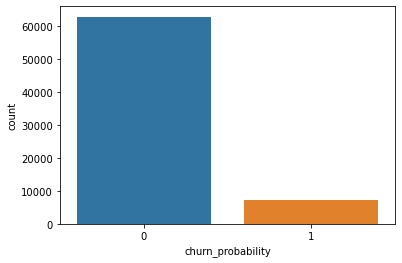

In [97]:
# Distribution of Churn Probability

univariate(churn_data['churn_probability'])

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


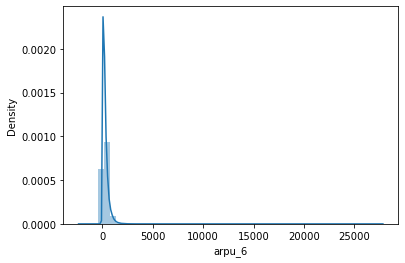

In [98]:
# Distribution of Average Revenue per user in June
univariate(churn_data.arpu_6)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


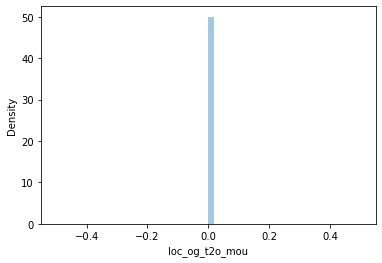

In [99]:
univariate(churn_data.loc_og_t2o_mou)

In [100]:
# This mean 'loc_og_t20_mou is a redudant column'

count    69999.000000
mean       127.641721
std        304.373330
min          0.000000
25%          7.360000
50%         32.100000
75%        106.280000
max      10752.560000
Name: onnet_mou_8, dtype: float64


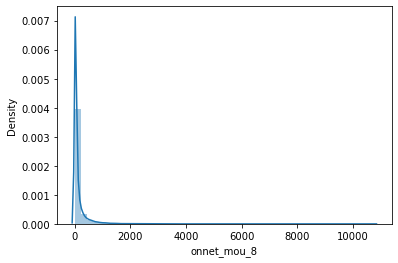

In [101]:
# Distribution of onnet_mou_8
univariate(churn_data.onnet_mou_8)

count    69999.000000
mean       191.002562
std        316.270571
min          0.000000
25%         34.390000
50%         91.800000
75%        216.410000
max      14007.340000
Name: offnet_mou_8, dtype: float64


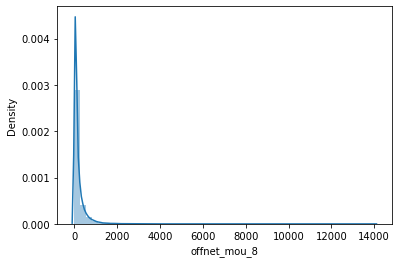

In [102]:
#Distribution of offnet_mou_8
univariate(churn_data.offnet_mou_8)

Varibles appear to  be **very skewed** towards the left.

### Bivariate Analysis

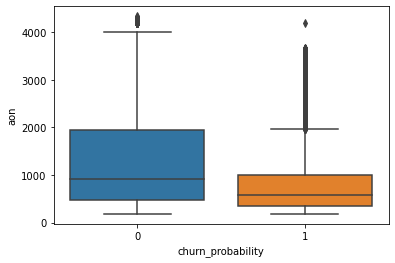

In [103]:
# churn probability vs aon
bivariate(churn_data['churn_probability'],churn_data.aon)

Clearly the customers who churn have been using the network for lesser number of days than non-churned customers.

In [104]:
churn_data.dtypes

loc_og_t2o_mou         float64
std_og_t2o_mou         float64
loc_ic_t2o_mou         float64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7           float64
loc_og_m

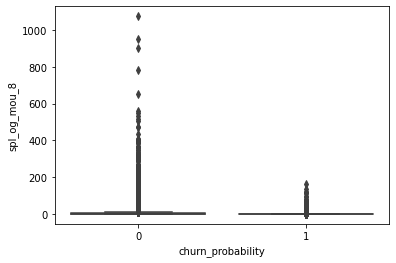

In [105]:
# chrun_probability vs spl_og_mou_8
bivariate(churn_data['churn_probability'],churn_data['spl_og_mou_8'])

we can see that for special outgoing calls the customer churn is very low.

In [106]:
# for Night_pack_user
pd.crosstab(churn_data['churn_probability'], churn_data.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn_probability,,,
0,87.375441,96.627842,96.899225
1,12.624559,3.372158,3.100775


<AxesSubplot:xlabel='churn_probability'>

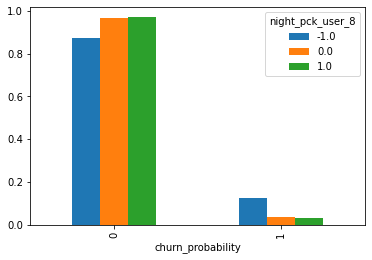

In [107]:
# Also visulizing the same 

pd.crosstab(churn_data['churn_probability'], churn_data.night_pck_user_8, normalize='columns').plot.bar()

very few of the customers who churned were night pack users in the month of august.

In [108]:
pd.crosstab(churn_data['churn_probability'] ,churn_data.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,29,30,38,41
churn_probability,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60016,1904,428,180,90,75,35,31,23,16,13,9,10,8,3,5,3,2,3,1,3,2,2,1,1,1,1,1
1,7043,65,7,9,3,1,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


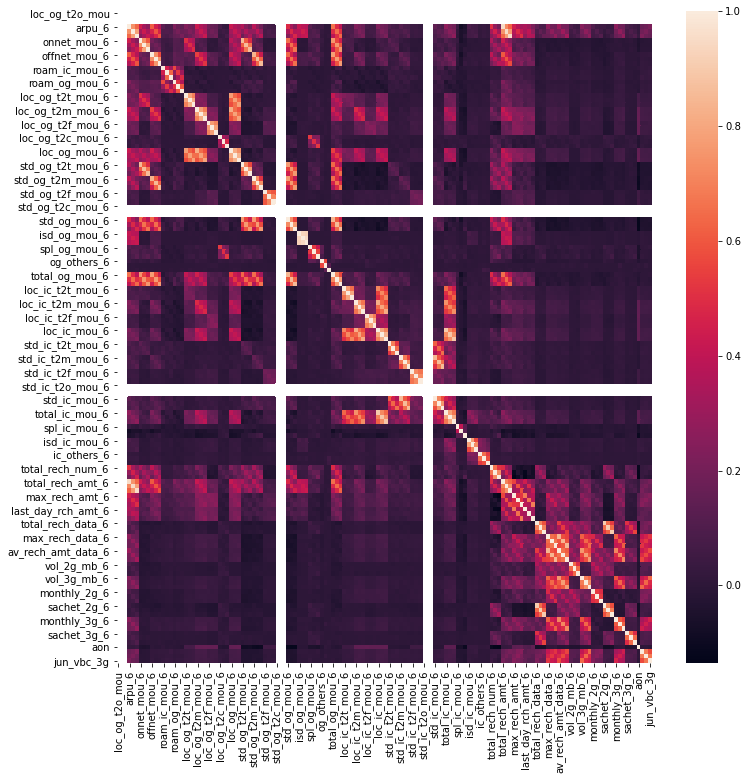

In [109]:
# checking the correlation between various  variables using heatmap 

plt.figure(figsize=(12,12))
sns.heatmap(churn_data.corr())
plt.show()

## Handling Outliers

**Here we will use k-sigma technique to cap outliers in the numeric variables**

In [110]:
# selecting numeric d_types
num_cols = churn_data.select_dtypes(exclude=['object']).columns.tolist()

In [111]:
#channging column type
churn_data[num_cols]=churn_data[num_cols].apply(pd.to_numeric)

In [112]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [113]:
# capping the outliers in numeric columns
churn_data[num_cols] = churn_data[num_cols].apply(cap_outliers, axis=0)

## Modelling 

### Importing Libraries

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Train Test Split

In [115]:
# divide data into train and test
X = churn_data.drop('churn_probability', axis = 1)
y = churn_data['churn_probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [116]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48999, 148)
(48999,)
(21000, 148)
(21000,)


### Dimensionality Reduction Using PCA

Since we have a large number of columns it would be difficult to create a model hence we use PCA to reduce the number of dimensions 

In [117]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [118]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [119]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       15.17
1       25.61
2       33.21
3       37.46
4       41.46
5       44.19
6       46.79
7       49.20
8       51.46
9       53.62
10      55.59
11      57.51
12      59.31
13      60.88
14      62.43
15      63.92
16      65.32
17      66.68
18      67.91
19      69.02
20      70.08
21      71.14
22      72.14
23      73.09
24      74.01
25      74.93
26      75.83
27      76.67
28      77.48
29      78.26
30      78.98
31      79.64
32      80.30
33      80.93
34      81.56
35      82.17
36      82.77
37      83.36
38      83.93
39      84.48
40      85.00
41      85.50
42      85.98
43      86.46
44      86.93
45      87.38
46      87.79
47      88.21
48      88.61
49      89.01
50      89.40
51      89.77
52      90.13
53      90.48
54      90.83
55      91.16
56      91.47
57      91.77
58      92.07
59      92.36
60      92.65
61      92.93
62      93.20
63      93.46
64      93.70
65      93.94
66      94.18
67      94.41
68      94.63
69      94.85
70      95.07
71    

 95% of the variance can be explained by 60 components

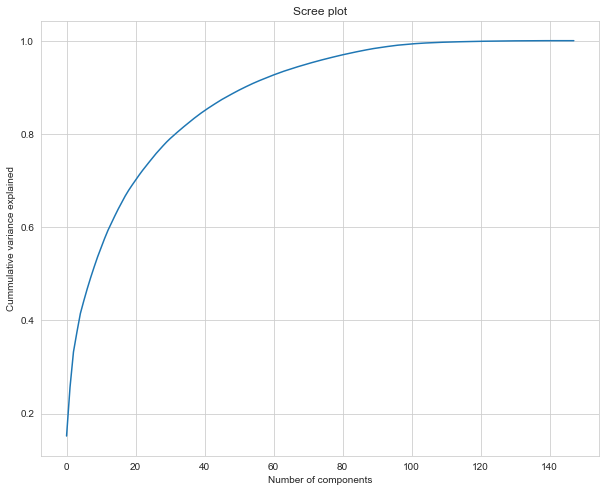

In [120]:
# Screeplot - plotting for cummulative explained_variance_ratio against number of components

# setting the style of the graph and figure size

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)   # cumulative variance

plt.plot(cumulative_variance)

# Labelling the graph on title and axes(X and Y)
plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance explained')

plt.show()

From the above screeplot we can conclude that the number of components best to select is 70 as it captures 95%of the variance.

### PCA and Logistic Regression

In [121]:
# create pipeline
PCA_VARS = 70
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [122]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7873834159880814

#### Evaluate of Test Data

In [123]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

print("Accuracy Score:{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score:{: }".format(recall_score(y_test,y_pred)))
print("F1 Score:{: }".format(f1_score(y_test,y_pred)))


[[14826  4034]
 [  343  1797]]
Accuracy Score: 0.7915714285714286
Recall Score: 0.8397196261682243
F1 Score: 0.4508844561535566


* As we can see from the above evaluation that accuracy is low and Recall is high.
* Also there is the case that our data is imbalanced which means for one class we have large proportions of data and for another we have less , hence this is the issue of such a poor model.

## Hyperparameter Tuning - PCA and logistic Regression

In [124]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.89812
1    0.10188
Name: churn_probability, dtype: float64

In [125]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [70, 90], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [126]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 11.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [70, 90]},
             scoring='roc_auc', verbose=1)

In [127]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.303032,0.216368,0.000000,0.000000,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,16.210992,0.451952,0.000000,0.000000,0.1,l1,90,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,15.046398,0.242736,0.302805,0.038914,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.883739,0.879174,0.876374,0.875459,0.878597,0.878668,0.002882,12
3,17.880200,0.391124,0.310808,0.046643,0.1,l2,90,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.885684,0.882991,0.878934,0.879647,0.881796,0.881810,0.002423,1
4,13.271398,0.372023,0.000000,0.000000,0.5,l1,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
5,17.533465,0.218302,0.000000,0.000000,0.5,l1,90,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
6,17.768315,0.997971,0.356406,0.092740,0.5,l2,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.882910,0.879289,0.876860,0.876537,0.877730,0.878665,0.002327,13
7,22.425154,1.404691,0.489022,0.061241,0.5,l2,90,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.885727,0.882948,0.878880,0.879496,0.881747,0.881759,0.002473,2
8,20.401441,0.911373,0.000000,0.000000,1,l1,70,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
9,23.448296,0.288201,0.000000,0.000000,1,l1,90,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24


In [128]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8818104017305359
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 90}


In [129]:
# creating a new pipeline 

PCA_VARS = 90
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(C=0.1,class_weight={0:0.1, 1: 0.9},penalty='l2'))
        ]
pipeline = Pipeline(steps)

In [130]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7886079307740974

In [131]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy Score:{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score:{: }".format(recall_score(y_test,y_pred)))
print("F1 Score:{: }".format(f1_score(y_test,y_pred)))

[[14817  4043]
 [  333  1807]]
Accuracy Score: 0.7916190476190477
Recall Score: 0.844392523364486
F1 Score: 0.4523153942428036


Clearly the Logistic regression model is giving very low accuracy for both train and test data.

So , we will look for another classification model 'Random Forest'

## Random Forest 

In [132]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Running the random forest with 15 trees
rf = RandomForestClassifier(n_estimators=15,random_state=100,oob_score=True)

In [134]:
%%time
rf.fit(X_train, y_train)

Wall time: 16.3 s


RandomForestClassifier(n_estimators=15, oob_score=True, random_state=100)

In [135]:
# Making predictions
y_pred = rf.predict(X_test)

# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

print("Accuracy Score:{: }".format(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18860
           1       0.79      0.57      0.66      2140

    accuracy                           0.94     21000
   macro avg       0.87      0.78      0.81     21000
weighted avg       0.94      0.94      0.94     21000

Accuracy Score: 0.9406666666666667


### Hyper-parameter Tuning For Random Forest

In [ ]:
## Using Grid Search to Find Optimal Parameters 

In [136]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}

In [137]:
# Create a based model
rf = RandomForestClassifier()

In [138]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="accuracy")

In [139]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

### Fitting the Best Model

In [140]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=15, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=15)

In [141]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=15)

In [142]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features=15, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=15)

In [143]:
# predictions

y_pred = rfc.predict(X_test)

In [144]:
# Classification Report and Accuracy 

print(classification_report(y_test,y_pred))

print("Accuracy Score:{: }".format(accuracy_score(y_test,y_pred)))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18860
           1       0.79      0.57      0.66      2140

    accuracy                           0.94     21000
   macro avg       0.87      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000

Accuracy Score: 0.941047619047619




**Thus Our Final Model is a RandomForestClassifier after being HyperTuned.**

**Accuracy Score : 0.941**

**Precison : 0.79**

**recall : 0.57**

**f-1 score : 0.66**

## Feature Importance

In [ ]:
# To find important features that are strong predictors to churn .

In [145]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [146]:
imp_df.sort_values(by="Imp", ascending=False).head(20)

,Varname,Imp
89,total_ic_mou_8,0.224674
59,total_og_mou_8,0.058877
5,arpu_8,0.054467
107,max_rech_amt_8,0.039438
104,total_rech_amt_8,0.038888
20,loc_og_t2t_mou_8,0.037626
38,std_og_t2m_mou_8,0.031280
65,loc_ic_t2m_mou_8,0.031225
71,loc_ic_mou_8,0.025744
58,total_og_mou_7,0.025692


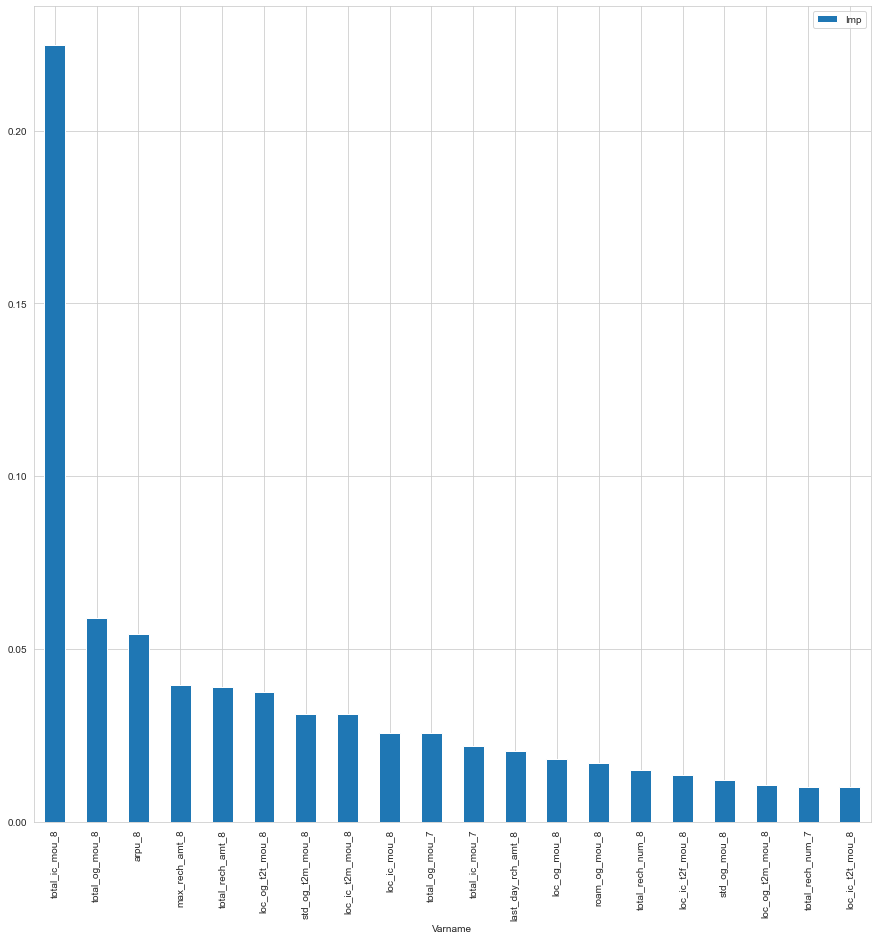

In [205]:
df=imp_df.sort_values(by="Imp", ascending=False).head(20)
df.plot(x='Varname',y='Imp',kind='bar')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

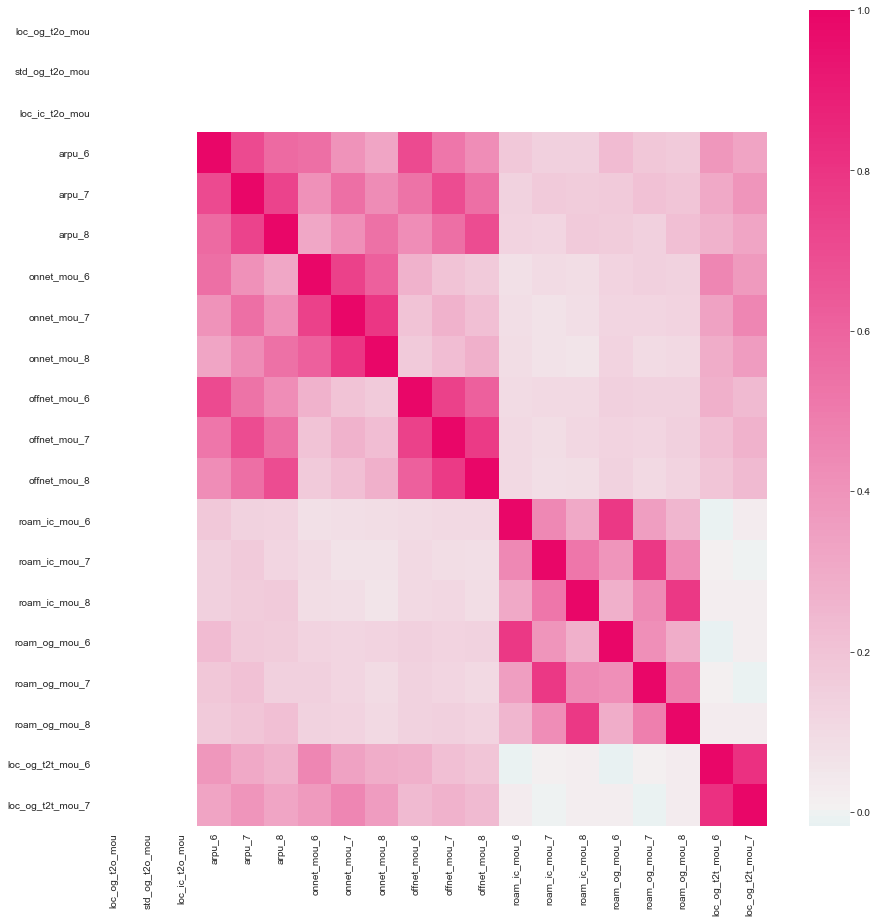

In [147]:
# extract top 'n' features
top_n =20
top_features = imp_df.Varname[0:top_n]

# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,15)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

There are three redudant variables :

'loc_og_t20_mou'

'std_og_t20_mou'

'loc_ic_t20_mou'

## Data Pre-processing of unseen data

In [180]:
# lets just check the unseen data first 

print(unseen_data.shape)


(30000, 171)


In [181]:
unseen_data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,2

In [182]:
# looking at satistical description 

unseen_data.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000,29798,29633,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29494,29467,28839,30000.000000,30000.000000,30000.000000,7585

In [183]:
# setting the id column as index
unseen_data.set_index('id',inplace=True)


### Handling Missing Values of Unseen data 

In [184]:

missing_data_percent = (unseen_data.isnull().sum().sort_values(ascending=False))*100/unseen_data.shape[0]
missing_data_percent

arpu_3g_6                   74.716667
count_rech_2g_6             74.716667
date_of_last_rech_data_6    74.716667
av_rech_amt_data_6          74.716667
fb_user_6                   74.716667
arpu_2g_6                   74.716667
total_rech_data_6           74.716667
night_pck_user_6            74.716667
max_rech_data_6             74.716667
count_rech_3g_6             74.716667
av_rech_amt_data_7          74.313333
count_rech_3g_7             74.313333
arpu_3g_7                   74.313333
arpu_2g_7                   74.313333
night_pck_user_7            74.313333
count_rech_2g_7             74.313333
max_rech_data_7             74.313333
total_rech_data_7           74.313333
date_of_last_rech_data_7    74.313333
fb_user_7                   74.313333
count_rech_2g_8             73.593333
max_rech_data_8             73.593333
night_pck_user_8            73.593333
total_rech_data_8           73.593333
arpu_2g_8                   73.593333
date_of_last_rech_data_8    73.593333
arpu_3g_8   

In [185]:
# Imputing with Zeroes

# Imputing recharge columns
rechargeColumns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'] 

In [186]:
# Creating a list of recharge columns which can be imputed with 0s

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [187]:
# impute missing values with 0
unseen_data[zero_impute] = unseen_data[zero_impute].apply(lambda x: x.fillna(0))

In [188]:
# Checking null values for all columns
round((unseen_data.isnull().mean().sort_values(ascending=False))*100,2)

arpu_2g_6                   74.72
count_rech_3g_6             74.72
night_pck_user_6            74.72
date_of_last_rech_data_6    74.72
fb_user_6                   74.72
arpu_3g_6                   74.72
count_rech_2g_6             74.72
arpu_2g_7                   74.31
date_of_last_rech_data_7    74.31
arpu_3g_7                   74.31
count_rech_2g_7             74.31
night_pck_user_7            74.31
fb_user_7                   74.31
count_rech_3g_7             74.31
night_pck_user_8            73.59
arpu_3g_8                   73.59
count_rech_3g_8             73.59
arpu_2g_8                   73.59
date_of_last_rech_data_8    73.59
count_rech_2g_8             73.59
fb_user_8                   73.59
loc_og_t2t_mou_8             5.58
std_ic_t2m_mou_8             5.58
std_ic_t2f_mou_8             5.58
std_ic_t2t_mou_8             5.58
std_og_t2f_mou_8             5.58
loc_og_t2f_mou_8             5.58
std_ic_t2o_mou_8             5.58
std_ic_mou_8                 5.58
loc_og_t2c_mou

In [189]:
# Creating list of columns by column type 

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8']


cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
            
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']

In [190]:
# dropping the date columns
id_col = ['circle_id']
unseen_data = unseen_data.drop(id_col+date_cols,axis=1)

In [191]:
# Replacing the NaN values in categorical column by -1 

# replace missing values with '-1' in categorical columns
unseen_data[cat_cols] = unseen_data[cat_cols].apply(lambda x: x.fillna(-1))

In [192]:
# Dropping the columns which have more than 40% null values
invalidColumns=unseen_data.isnull().sum()
invalidColumns=invalidColumns[invalidColumns.values/len(unseen_data)>0.40]
invalidColumns=list(invalidColumns.keys())
unseen_data=unseen_data.drop(invalidColumns,axis=1)

In [193]:
# Checking again now for null values

round((unseen_data.isnull().mean().sort_values(ascending=False))*100,2)

loc_og_t2m_mou_8      5.58
loc_og_t2t_mou_8      5.58
og_others_8           5.58
std_ic_t2o_mou_8      5.58
loc_og_t2f_mou_8      5.58
std_ic_mou_8          5.58
spl_og_mou_8          5.58
loc_og_t2c_mou_8      5.58
loc_og_mou_8          5.58
spl_ic_mou_8          5.58
std_og_t2t_mou_8      5.58
isd_ic_mou_8          5.58
std_og_t2m_mou_8      5.58
ic_others_8           5.58
isd_og_mou_8          5.58
std_og_t2f_mou_8      5.58
std_og_mou_8          5.58
std_ic_t2f_mou_8      5.58
std_og_t2c_mou_8      5.58
offnet_mou_8          5.58
std_ic_t2m_mou_8      5.58
roam_og_mou_8         5.58
std_ic_t2t_mou_8      5.58
roam_ic_mou_8         5.58
loc_ic_mou_8          5.58
loc_ic_t2t_mou_8      5.58
loc_ic_t2m_mou_8      5.58
onnet_mou_8           5.58
loc_ic_t2f_mou_8      5.58
loc_ic_t2f_mou_7      3.91
loc_ic_t2t_mou_7      3.91
isd_og_mou_7          3.91
loc_ic_t2m_mou_7      3.91
ic_others_7           3.91
std_ic_t2f_mou_7      3.91
isd_ic_mou_7          3.91
std_ic_t2o_mou_7      3.91
l

In [195]:
# Imputing the remaining numerical columns withe median values

unseen_data=unseen_data.fillna(unseen_data.median())

In [196]:
#checking the null values if left any 

unseen_data.isnull().sum().sort_values(ascending=False)

jun_vbc_3g            0
og_others_6           0
spl_og_mou_7          0
spl_og_mou_6          0
isd_og_mou_8          0
isd_og_mou_7          0
isd_og_mou_6          0
std_og_mou_8          0
std_og_mou_7          0
std_og_mou_6          0
std_og_t2c_mou_8      0
std_og_t2c_mou_7      0
std_og_t2c_mou_6      0
std_og_t2f_mou_8      0
std_og_t2f_mou_7      0
std_og_t2f_mou_6      0
std_og_t2m_mou_8      0
spl_og_mou_8          0
og_others_7           0
jul_vbc_3g            0
og_others_8           0
loc_ic_mou_8          0
loc_ic_mou_7          0
loc_ic_mou_6          0
loc_ic_t2f_mou_8      0
loc_ic_t2f_mou_7      0
loc_ic_t2f_mou_6      0
loc_ic_t2m_mou_8      0
loc_ic_t2m_mou_7      0
loc_ic_t2m_mou_6      0
loc_ic_t2t_mou_8      0
loc_ic_t2t_mou_7      0
loc_ic_t2t_mou_6      0
total_og_mou_8        0
total_og_mou_7        0
total_og_mou_6        0
std_og_t2m_mou_7      0
std_og_t2m_mou_6      0
std_og_t2t_mou_8      0
std_og_t2t_mou_7      0
roam_og_mou_6         0
roam_ic_mou_8   

In [197]:
unseen_data[cat_cols]=unseen_data[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [198]:
# selecting numeric d_types
num_cols = unseen_data.select_dtypes(exclude=['object']).columns.tolist()

#channging column type
unseen_data[num_cols]=unseen_data[num_cols].apply(pd.to_numeric)

## Creating Submission File

In [199]:
unseen_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1692,0.00,0.00,0.00
70000,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,2533,0.00,0.00,0.00
70001,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0

In [200]:
unseen_data['churn_probability']= rfc.predict(unseen_data)

In [201]:
unseen_data = unseen_data.reset_index()


In [202]:
output = unseen_data[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [203]:
output.shape

(30000, 2)

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [204]:
output.to_csv('submission_T2_churn.csv',index=False)

## Model Explanation

The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said - In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.Thus to predict or analyse the behavior of a customer over a time period of good phase and the action phase we created predictive models as mentioned below -


1.Logistic Regression with PCA(dimensionality reduction)

2.Logistic Regresssion Model after hyperparameter tuning

3.Random forest


The first two models did not give satisfactory accuracy even after PCA and Hyperparameter Tuning. We finally used random forest model with 15 estimators,hypertuned it and recreated it the best estimators. This final model was better than all the other models.

* Accuracy Score: 0.941047619047619

Thus our final model gave best accuracy among all other models

### Suggested strategies 

- The company needs to pay attention to the roaming rates. They need to provide good offers for the roaming zone services.
- Local calling customer from one operator to other mobile is huge; Give best offers to them.
- Also give special offers to the customer who are calling locally within same operator.
- The customer who's recharge is max can be provided with more days of validity.